# =========================================================
# 002_SPA_EDA.ipynb  (Exploratory Data Analysis - SPA)
# =========================================================
# Este script realiza un análisis exploratorio de datos (EDA) para el dataset SPA.
# Incluye chequeos de calidad, consistencia temporal, duplicados, y exploración de variables clave.
# Ajusta las rutas y nombres de columnas según tu entorno.
# =========================================================


In [51]:
# Instalar librerías necesarias
import sys
import subprocess
subprocess.check_call([sys.executable, "-m", "pip", "install", "matplotlib", "seaborn"])

0

In [52]:
# -----------------------------
# 0) Libraries & Environment
# -----------------------------
import os
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [53]:
from pathlib import Path
import pandas as pd

data_path = Path.cwd().parent / "data" / "consumosustancias.csv"  # ../data/consumosustancias.csv
print(data_path, data_path.exists())  # debe dar True

spa_df = pd.read_csv(data_path)
spa_df.head()


/Users/danielamarinvillacorte/Desktop/ETL/Proyecto 2/ODS_3_Diabetes/notebooks/data/consumosustancias.csv True


/var/folders/8s/r8s1f24512j4g34swfpyjjjm0000gn/T/ipykernel_15959/3981861118.py:7: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  spa_df = pd.read_csv(data_path)


,_id,ANO,SEXO,NOMBRELOCALIDADRESIDENCIA,MESNOTIFICACION,TRIMESTRE,TIPOASEGURAMIENTO,SITIOHABITUALCONSUMO_VIVIENDA,SITIOHABITUALCONSUMO_PARQUE,SITIOHABITUALCONSUMO_EST_EDUCATIVO,...,SITIOHABITUALCONSUMO_CASA_AMIGOS,NIVELEDUCATIVO,CURSO_DE_VIDA,COMOACUDIOTRATAMIENTO,PERTENENCIAETNICA,ORIENTSEXUAL,PAISNACIONALIDAD,NOMBREUPZ,ESTADOCIVIL,CASOS
0,173095,2022.0,Hombre,Puente Aranda,6.0,2.0,Contributivo,NO,NO,NO,...,SI,8. Técnico post-secundaria completa,Juventud,1. Voluntariamente,Otros,Heterosexual,Sin Dato,ZONA INDUSTRIAL,1. Soltero (a),2
1,173096,2022.0,Hombre,Kennedy,7.0,3.0,Subsidiado,NO,NO,NO,...,SI,9. Universidad incompleta,Juventud,1. Voluntariamente,Otros,Heterosexual,Sin Dato,KENNEDY CENTRAL,6. Union libre,1
2,173097,2022.0,Mujer,Santa Fe,9.0,3.0,Subsidiado,NO,NO,NO,...,NO,6. Secundaria completa,Juventud,1. Voluntariamente,Otros,Heterosexual,Sin Dato,LAS NIEVES,1. Soltero (a),1
3,173098,2022.0,Hombre,Sin dato,11.0,4.0,Subsidiado,NO,SI,NO,...,SI,5. Secundaria incompleta,Adultez,1. Voluntariamente,Otros,Heterosexual,Sin Dato,Sin Dato,1. Soltero (a),1
4,173099,2022.0,Hombre,Bosa,11.0,4.0,Subsidiado,NO,NO,SI,...,NO,5. Secundaria incompleta,Adolescencia,2. Lo llevaron familiares,Otros,Heterosexual,Sin Dato,BOSA OCCIDENTAL,1. Soltero (a),1


Existe el archivo? True
SHAPE: (91037, 22)


/var/folders/8s/r8s1f24512j4g34swfpyjjjm0000gn/T/ipykernel_15959/1272617744.py:12: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(SPA_CSV)


,_id,ANO,SEXO,NOMBRELOCALIDADRESIDENCIA,MESNOTIFICACION,TRIMESTRE,TIPOASEGURAMIENTO,SITIOHABITUALCONSUMO_VIVIENDA,SITIOHABITUALCONSUMO_PARQUE,SITIOHABITUALCONSUMO_EST_EDUCATIVO,...,SITIOHABITUALCONSUMO_CASA_AMIGOS,NIVELEDUCATIVO,CURSO_DE_VIDA,COMOACUDIOTRATAMIENTO,PERTENENCIAETNICA,ORIENTSEXUAL,PAISNACIONALIDAD,NOMBREUPZ,ESTADOCIVIL,CASOS
0,173095,2022.0,Hombre,Puente Aranda,6.0,2.0,Contributivo,NO,NO,NO,...,SI,8. Técnico post-secundaria completa,Juventud,1. Voluntariamente,Otros,Heterosexual,Sin Dato,ZONA INDUSTRIAL,1. Soltero (a),2
1,173096,2022.0,Hombre,Kennedy,7.0,3.0,Subsidiado,NO,NO,NO,...,SI,9. Universidad incompleta,Juventud,1. Voluntariamente,Otros,Heterosexual,Sin Dato,KENNEDY CENTRAL,6. Union libre,1
2,173097,2022.0,Mujer,Santa Fe,9.0,3.0,Subsidiado,NO,NO,NO,...,NO,6. Secundaria completa,Juventud,1. Voluntariamente,Otros,Heterosexual,Sin Dato,LAS NIEVES,1. Soltero (a),1
3,173098,2022.0,Hombre,Sin dato,11.0,4.0,Subsidiado,NO,SI,NO,...,SI,5. Secundaria incompleta,Adultez,1. Voluntariamente,Otros,Heterosexual,Sin Dato,Sin Dato,1. Soltero (a),1
4,173099,2022.0,Hombre,Bosa,11.0,4.0,Subsidiado,NO,NO,SI,...,NO,5. Secundaria incompleta,Adolescencia,2. Lo llevaron familiares,Otros,Heterosexual,Sin Dato,BOSA OCCIDENTAL,1. Soltero (a),1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91037 entries, 0 to 91036
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   _id                                  91037 non-null  int64  
 1   ANO                                  91036 non-null  float64
 2   SEXO                                 91026 non-null  object 
 3   NOMBRELOCALIDADRESIDENCIA            91014 non-null  object 
 4   MESNOTIFICACION                      91036 non-null  float64
 5   TRIMESTRE                            91036 non-null  float64
 6   TIPOASEGURAMIENTO                    91036 non-null  object 
 7   SITIOHABITUALCONSUMO_VIVIENDA        91036 non-null  object 
 8   SITIOHABITUALCONSUMO_PARQUE          91036 non-null  object 
 9   SITIOHABITUALCONSUMO_EST_EDUCATIVO   91036 non-null  object 
 10  SITIOHABITUALCONSUMO_BARES_TABERNAS  91036 non-null  object 
 11  SITIOHABITUALCONSUMO_VIA_PUB

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
_id,91037.0,NaN,NaN,NaN,218613.0,26280.262565,173095.0,195854.0,218613.0,241372.0,264131.0
ANO,91036.0,NaN,NaN,NaN,2020.037227,3.215988,2015.0,2017.0,2020.0,2023.0,2025.0
SEXO,91026,3,Hombre,66675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NOMBRELOCALIDADRESIDENCIA,91014,22,Kennedy,8134,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MESNOTIFICACION,91036.0,NaN,NaN,NaN,6.41722,3.415972,1.0,3.0,6.0,9.0,12.0
TRIMESTRE,91036.0,NaN,NaN,NaN,2.476405,1.11184,1.0,1.0,2.0,3.0,4.0
TIPOASEGURAMIENTO,91036,8,Contributivo,40436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIOHABITUALCONSUMO_VIVIENDA,91036,2,NO,59646,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIOHABITUALCONSUMO_PARQUE,91036,2,NO,48790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SITIOHABITUALCONSUMO_EST_EDUCATIVO,91036,2,NO,82366,NaN,NaN,NaN,NaN,NaN,NaN,NaN



NULOS POR COLUMNA (suma)


ESTADOCIVIL                            151
PERTENENCIAETNICA                      108
NOMBRELOCALIDADRESIDENCIA               23
NIVELEDUCATIVO                          14
SEXO                                    11
COMOACUDIOTRATAMIENTO                   11
SITIOHABITUALCONSUMO_VIA_PUBLICA         1
SITIOHABITUALCONSUMO_CASA_AMIGOS         1
PAISNACIONALIDAD                         1
ORIENTSEXUAL                             1
CURSO_DE_VIDA                            1
SITIOHABITUALCONSUMO_BARES_TABERNAS      1
ANO                                      1
SITIOHABITUALCONSUMO_EST_EDUCATIVO       1
SITIOHABITUALCONSUMO_PARQUE              1
SITIOHABITUALCONSUMO_VIVIENDA            1
TIPOASEGURAMIENTO                        1
TRIMESTRE                                1
MESNOTIFICACION                          1
NOMBREUPZ                                1
_id                                      0
CASOS                                    0
dtype: int64


NÚMERO DE ÚNICOS POR COLUMNA


_id                                    91037
ANO                                       11
SEXO                                       3
NOMBRELOCALIDADRESIDENCIA                 22
MESNOTIFICACION                           12
TRIMESTRE                                  4
TIPOASEGURAMIENTO                          8
SITIOHABITUALCONSUMO_VIVIENDA              2
SITIOHABITUALCONSUMO_PARQUE                2
SITIOHABITUALCONSUMO_EST_EDUCATIVO         2
SITIOHABITUALCONSUMO_BARES_TABERNAS        2
SITIOHABITUALCONSUMO_VIA_PUBLICA           2
SITIOHABITUALCONSUMO_CASA_AMIGOS           2
NIVELEDUCATIVO                            13
CURSO_DE_VIDA                              6
COMOACUDIOTRATAMIENTO                      8
PERTENENCIAETNICA                          8
ORIENTSEXUAL                               5
PAISNACIONALIDAD                          22
NOMBREUPZ                                116
ESTADOCIVIL                                7
CASOS                                     58
dtype: int


== ORIENTSEXUAL ==


ORIENTSEXUAL
Heterosexual    59005
Sin dato        29142
Homosexual       1942
Bisexual          853
Asexual            94
NaN                 1
Name: count, dtype: int64

ORIENTSEXUAL
Heterosexual    0.6481
Sin dato        0.3201
Homosexual      0.0213
Bisexual        0.0094
Asexual         0.0010
NaN             0.0000
Name: count, dtype: float64


== SEXO ==


SEXO
Hombre         66675
Mujer          24350
NaN               11
Intersexual        1
Name: count, dtype: int64

SEXO
Hombre         0.7324
Mujer          0.2675
NaN            0.0001
Intersexual    0.0000
Name: count, dtype: float64


== CURSO_DE_VIDA ==


CURSO_DE_VIDA
Juventud            37284
Adultez             34821
Adolescencia        15576
Vejez                3196
Infancia              152
Primera Infancia        7
NaN                     1
Name: count, dtype: int64

CURSO_DE_VIDA
Juventud            0.4095
Adultez             0.3825
Adolescencia        0.1711
Vejez               0.0351
Infancia            0.0017
Primera Infancia    0.0001
NaN                 0.0000
Name: count, dtype: float64


== NIVELEDUCATIVO ==


NIVELEDUCATIVO
5. Secundaria incompleta                 31015
6. Secundaria completa                   24537
9. Universidad incompleta                 6599
8. Técnico post-secundaria completa       6395
4. Primaria completa                      6218
3. Primaria incompleta                    5500
10. Universidad completa                  5013
7. Técnico post-secundaria incompleta     2992
1. No fue a la escuela                    1009
12. Postgrado completo                     697
99. Sin dato                               607
11. Postgrado incompleto                   276
2. Preescolar                              165
NaN                                         14
Name: count, dtype: int64

NIVELEDUCATIVO
5. Secundaria incompleta                 0.3407
6. Secundaria completa                   0.2695
9. Universidad incompleta                0.0725
8. Técnico post-secundaria completa      0.0702
4. Primaria completa                     0.0683
3. Primaria incompleta                   0.0604
10. Universidad completa                 0.0551
7. Técnico post-secundaria incompleta    0.0329
1. No fue a la escuela                   0.0111
12. Postgrado completo                   0.0077
99. Sin dato                             0.0067
11. Postgrado incompleto                 0.0030
2. Preescolar                            0.0018
NaN                                      0.0002
Name: count, dtype: float64


== TIPOASEGURAMIENTO ==


TIPOASEGURAMIENTO
Contributivo          40436
Subsidiado            37802
Vinculado              8645
Excepción              2126
Particular             1188
Regimen especial        481
Medicina prepagada      307
Sin Informacion          51
NaN                       1
Name: count, dtype: int64

TIPOASEGURAMIENTO
Contributivo          0.4442
Subsidiado            0.4152
Vinculado             0.0950
Excepción             0.0234
Particular            0.0130
Regimen especial      0.0053
Medicina prepagada    0.0034
Sin Informacion       0.0006
NaN                   0.0000
Name: count, dtype: float64


== PERTENENCIAETNICA ==


PERTENENCIAETNICA
Otros              86173
Mulato              1762
AfroColombianos      966
ROM                  751
Caucásico            678
Indígena             290
Raizal               251
NaN                  108
Palenquero            58
Name: count, dtype: int64

PERTENENCIAETNICA
Otros              0.9466
Mulato             0.0194
AfroColombianos    0.0106
ROM                0.0082
Caucásico          0.0074
Indígena           0.0032
Raizal             0.0028
NaN                0.0012
Palenquero         0.0006
Name: count, dtype: float64


== ESTADOCIVIL ==


ESTADOCIVIL
1. Soltero (a)       72355
6. Union libre       11153
2. Casado (a)         2996
4. Separado (a)       2961
3. Divorciado (a)      518
5. Viudo (a)           502
99. Sin dato           401
NaN                    151
Name: count, dtype: int64

ESTADOCIVIL
1. Soltero (a)       0.7948
6. Union libre       0.1225
2. Casado (a)        0.0329
4. Separado (a)      0.0325
3. Divorciado (a)    0.0057
5. Viudo (a)         0.0055
99. Sin dato         0.0044
NaN                  0.0017
Name: count, dtype: float64


== NOMBREUPZ ==


NOMBREUPZ
Sin Dato            10317
LA SABANA            4932
BOSA CENTRAL         3176
LAS NIEVES           2402
EL RINCON            2371
                    ...  
LA ACADEMIA             7
EL MOCHUELO             6
UPR Rio San Juan        1
GUAYMARAL               1
NaN                     1
Name: count, Length: 117, dtype: int64

NOMBREUPZ
Sin Dato            0.1133
LA SABANA           0.0542
BOSA CENTRAL        0.0349
LAS NIEVES          0.0264
EL RINCON           0.0260
                     ...  
LA ACADEMIA         0.0001
EL MOCHUELO         0.0001
UPR Rio San Juan    0.0000
GUAYMARAL           0.0000
NaN                 0.0000
Name: count, Length: 117, dtype: float64

Antes - filas con UPZ sin dato: 12361
Imputadas: 12361
Aún sin UPZ (p.ej. localidad sin dato o sin moda): 0
Aún sin UPZ (incluye NaN): 4942


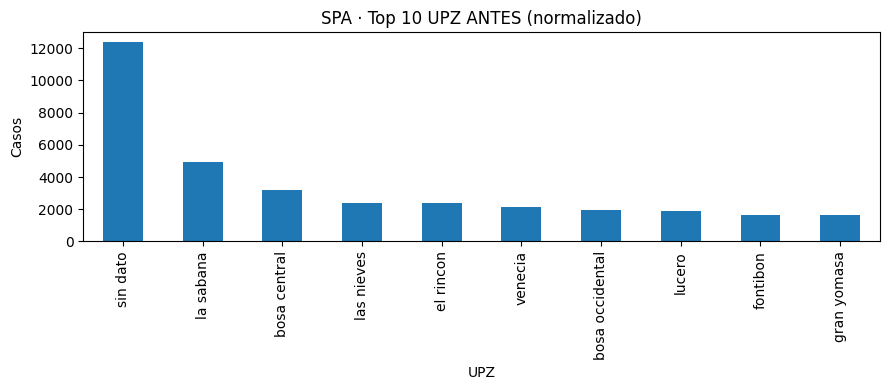

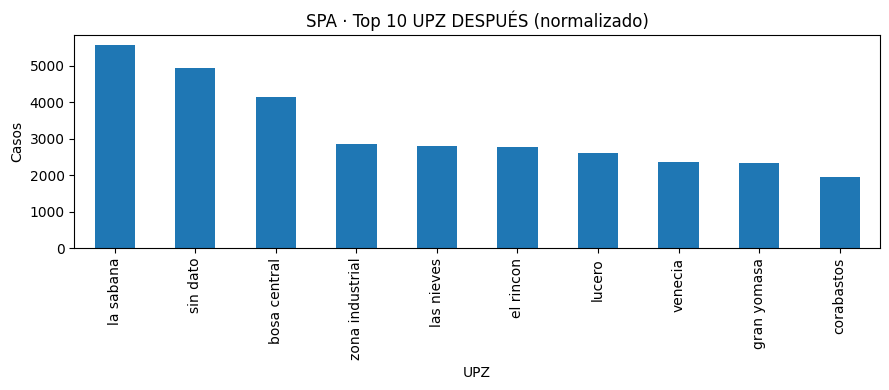


CLAVE SPA: ['ANO', 'NOMBREUPZ', 'SEXO', 'CURSO_DE_VIDA', 'NIVELEDUCATIVO']
Duplicados por clave: 80014


,ANO,NOMBREUPZ,SEXO,CURSO_DE_VIDA,NIVELEDUCATIVO,CASOS
0,2022.0,ZONA INDUSTRIAL,Hombre,Juventud,8. Técnico post-secundaria completa,2
1,2022.0,KENNEDY CENTRAL,Hombre,Juventud,9. Universidad incompleta,1
2,2022.0,LAS NIEVES,Mujer,Juventud,6. Secundaria completa,1
3,2022.0,<NA>,Hombre,Adultez,5. Secundaria incompleta,1
4,2022.0,BOSA OCCIDENTAL,Hombre,Adolescencia,5. Secundaria incompleta,1
5,2022.0,TIMIZA,Mujer,Adolescencia,5. Secundaria incompleta,1
6,2023.0,LA CANDELARIA,Mujer,Adultez,10. Universidad completa,1
7,2023.0,<NA>,Hombre,Adultez,5. Secundaria incompleta,7
8,2023.0,LAS NIEVES,Hombre,Adultez,6. Secundaria completa,1
9,2023.0,<NA>,Hombre,Adultez,5. Secundaria incompleta,12



SPA – UPZ (todas) con frecuencias (normalizado):


,UPZ,frecuencia
0,la sabana,5565
1,sin dato,4942
2,bosa central,4138
3,zona industrial,2843
4,las nieves,2805
...,...,...
109,monte blanco,12
110,la academia,7
111,el mochuelo,6
112,upr rio san juan,5


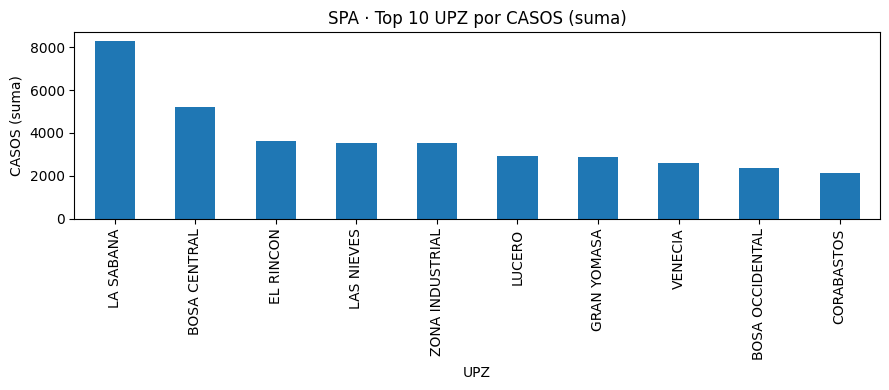


Pivot ANO × UPZ (muestra)


NOMBREUPZ,20 DE JULIO,AEROPUERTO EL DORADO,ALAMOS,ALFONSO LOPEZ,AMERICAS,APOGEO,ARBORIZADORA,BAVARIA
ANO,,,,,,,,
2015.0,54.0,2.0,6.0,135.0,19.0,50.0,79.0,40.0
2016.0,212.0,1.0,6.0,96.0,28.0,10.0,71.0,34.0
2017.0,78.0,2.0,2.0,63.0,17.0,7.0,95.0,42.0
2018.0,48.0,1.0,4.0,11.0,20.0,7.0,16.0,16.0
2019.0,98.0,2.0,7.0,61.0,52.0,16.0,62.0,44.0


In [54]:
# ========= 0) Imports & Paths =========
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------ RUTA ------------
SPA_CSV = Path("../data/consumosustancias.csv")  # <-- AJUSTA
print("Existe el archivo?", SPA_CSV.exists())

# ========= 1) Carga =========
df = pd.read_csv(SPA_CSV)
print("SHAPE:", df.shape)
display(df.head(5))
df.info()
display(df.describe(include="all").T.head(30))

# ========= 2) Nulos por columna (suma) & únicos =========
print("\nNULOS POR COLUMNA (suma)")
display(df.isna().sum().sort_values(ascending=False))

print("\nNÚMERO DE ÚNICOS POR COLUMNA")
display(df.nunique())

# (Opcional) Frecuencias rápidas de columnas clave
cols_spa = [c for c in [
    "ORIENTSEXUAL", "SEXO", "CURSO_DE_VIDA", "NIVELEDUCATIVO",
    "TIPOASEGURAMIENTO", "PERTENENCIAETNICA", "ESTADOCIVIL", "NOMBREUPZ"
] if c in df.columns]

for c in cols_spa:
    print(f"\n== {c} ==")
    vc = df[c].value_counts(dropna=False)
    display(vc)                    # frecuencias absolutas
    display((vc / len(df)).round(4))  # proporciones

# ========= 3) Normalización ligera & set 'sin dato' =========
bad_set = {"", "nan", "sin dato", "upz sin asignar", "s/d", "n.a.", "n.a", "na"}
df["NOMBREUPZ"] = df["NOMBREUPZ"].astype("string").str.strip()
df["NOMBRELOCALIDADRESIDENCIA"] = df["NOMBRELOCALIDADRESIDENCIA"].astype("string").str.strip()

# ========= 3.1) Unificar variantes de “sin dato” (UPZ y Localidad) =========
# (para que tablas y gráficos usen la misma base)
s_upz = df["NOMBREUPZ"].str.lower()
mask_bad_upz = s_upz.str.match(r'^(sin dato|upz sin asignar|n\.?a\.?|n/?a|s/?d|na)$', na=True)
df["UPZ_norm"] = s_upz.where(~mask_bad_upz, "sin dato").fillna("sin dato")

s_loc = df["NOMBRELOCALIDADRESIDENCIA"].str.lower()
mask_bad_loc = s_loc.str.match(r'^(sin dato|n\.?a\.?|n/?a|s/?d|na)$', na=True)
df["LOC_norm"] = s_loc.where(~mask_bad_loc, "sin dato").fillna("sin dato")

# ========= 4) Copia para comparación (ANTES) =========
upz_before = df["NOMBREUPZ"].copy()      # crudo
upz_before_norm = df["UPZ_norm"].copy()  # normalizado (recomendado para tablas/gráficas)

# ========= 5–6) Imputación UPZ por moda (con métricas antes/después) =========
# a) Conteo ANTES (solo textos “malos”, SIN NaN: para comparar con métricas antiguas)
bad_text_mask_pre = df["NOMBREUPZ"].astype("string").str.strip().str.lower().isin(bad_set)
print("Antes - filas con UPZ sin dato:", int(bad_text_mask_pre.sum()))

# b) Preparar máscaras + tabla de modas por Localidad (excluye 'sin dato' y NaN)
m_bad_upz = df["NOMBREUPZ"].astype("string").str.strip().str.lower().isin(bad_set) | df["NOMBREUPZ"].isna()
m_bad_loc = df["NOMBRELOCALIDADRESIDENCIA"].astype("string").str.strip().str.lower().isin(bad_set) | df["NOMBRELOCALIDADRESIDENCIA"].isna()

tmp = df.loc[~m_bad_upz & ~m_bad_loc, ["NOMBRELOCALIDADRESIDENCIA", "NOMBREUPZ"]].copy()
modo_por_loc = tmp.groupby("NOMBRELOCALIDADRESIDENCIA")["NOMBREUPZ"] \
                  .agg(lambda s: s.mode().iloc[0] if not s.mode().empty else np.nan)

# c) Imputar: UPZ “sin dato”/NaN <- moda de su Localidad
df.loc[m_bad_upz, "NOMBREUPZ"] = df.loc[m_bad_upz, "NOMBRELOCALIDADRESIDENCIA"].map(modo_por_loc)

# d) Métricas DESPUÉS
bad_text_mask_post = df["NOMBREUPZ"].astype("string").str.strip().str.lower().isin(bad_set)
print("Imputadas:", int(bad_text_mask_pre.sum() - bad_text_mask_post.sum()))
print("Aún sin UPZ (p.ej. localidad sin dato o sin moda):", int(bad_text_mask_post.sum()))

bad_with_nan_post = bad_text_mask_post | df["NOMBREUPZ"].isna()
print("Aún sin UPZ (incluye NaN):", int(bad_with_nan_post.sum()))

# ========= 6bis) Series normalizadas ANTES/DESPUÉS para gráficos/tablas =========
s_after = df["NOMBREUPZ"].astype("string").str.strip().str.lower()
mask_bad_after = s_after.str.match(r'^(sin dato|upz sin asignar|n\.?a\.?|n/?a|s/?d|na)$', na=True)
upz_after_norm = s_after.where(~mask_bad_after, "sin dato").fillna("sin dato")

# ========= 7) Comparación ANTES vs DESPUÉS (gráficas) =========
plt.figure(figsize=(9,4))
upz_before_norm.value_counts().head(10).plot(kind="bar")
plt.title("SPA · Top 10 UPZ ANTES (normalizado)"); plt.ylabel("Casos"); plt.xlabel("UPZ")
plt.tight_layout(); plt.show()

plt.figure(figsize=(9,4))
upz_after_norm.value_counts().head(10).plot(kind="bar")
plt.title("SPA · Top 10 UPZ DESPUÉS (normalizado)"); plt.ylabel("Casos"); plt.xlabel("UPZ")
plt.tight_layout(); plt.show()

# ========= 8) Duplicados por clave de merge =========
key_spa = [c for c in ["ANO","NOMBREUPZ","SEXO","CURSO_DE_VIDA","NIVELEDUCATIVO"] if c in df.columns]
print("\nCLAVE SPA:", key_spa)
if key_spa:
    dup_count = df.duplicated(subset=key_spa, keep=False).sum()
    print("Duplicados por clave:", dup_count)
    if dup_count > 0:
        cols_show = key_spa + (["CASOS"] if "CASOS" in df.columns else [])
        display(df.loc[df.duplicated(subset=key_spa, keep=False), cols_show].head(10))

# ========= 9) Frecuencias completas de UPZ (normalizado) =========
spa_upz_freq = upz_after_norm.value_counts().rename_axis("UPZ").reset_index(name="frecuencia")
print("\nSPA – UPZ (todas) con frecuencias (normalizado):")
display(spa_upz_freq)
# spa_upz_freq.to_csv("spa_upz_frecuencias.csv", index=False)

# ========= 10) Pivotes / Gráficas rápidas =========
if {"CASOS","NOMBREUPZ"}.issubset(df.columns):
    tmp_num = pd.to_numeric(df["CASOS"], errors="coerce")
    top_upz = df.assign(CASOS_num=tmp_num).groupby("NOMBREUPZ")["CASOS_num"].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(9,4)); top_upz.plot(kind="bar")
    plt.title("SPA · Top 10 UPZ por CASOS (suma)"); plt.ylabel("CASOS (suma)"); plt.xlabel("UPZ"); plt.tight_layout(); plt.show()

if {"ANO","NOMBREUPZ","CASOS"}.issubset(df.columns):
    pv = pd.pivot_table(df.assign(CASOS_num=pd.to_numeric(df["CASOS"], errors="coerce")),
                        index="ANO", columns="NOMBREUPZ", values="CASOS_num", aggfunc="sum")
    print("\nPivot ANO × UPZ (muestra)")
    display(pv.iloc[:5, :8])
